## Section 6.2: Module Parameters Tuning

In [5]:
import torch

def load_losses(path, env, folder):
    ckpt = torch.load(path + '/' + env + 'DelayEnv-run' + str(folder) + '/encoder.pt')
    return torch.as_tensor(ckpt['reco_losses'])

def stats_encoder(env, test_type, tests):
    path = '../output/recoencoder/' + env + '-Results/Results-' + test_type
    losses = torch.cat(([load_losses(path, env, folder).unsqueeze(0) for folder in tests]), dim=0)
    mean = torch.mean(losses, dim=0)
    std = torch.std(losses, dim=0)
    return mean, std

In [47]:
from matplotlib import pyplot as plt
import numpy as np

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='large')
plt.rc('ytick', labelsize='large')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='x-large')


### Cross-Validation
Plots for the Cross-Validation process:
  - Module: [32, 32, 2] - 14307
  - Module: [16, 32, 2] - 12227
  - Module: [32, 16, 2] - 4883
  - Module: [32, 32, 1] - 7843
  - Module: [16, 16, 1] - 2131

In [8]:
env = 'Pendulum'
test_type = 'EncoderParameters'

mean_16_16_1, std_16_16_1 = stats_encoder(env, test_type, [1, 2, 3])
mean_32_32_2, std_32_32_2 = stats_encoder(env, test_type, [4, 5, 6])
mean_16_32_2, std_16_32_2 = stats_encoder(env, test_type, [7, 8, 9])
mean_32_16_2, std_32_16_2 = stats_encoder(env, test_type, [10, 11, 12])
mean_32_32_1, std_32_32_1 = stats_encoder(env, test_type, [16, 17, 18])

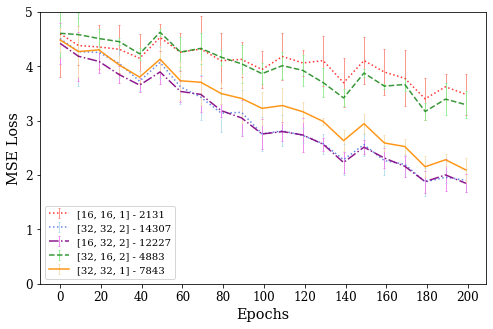

In [50]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(-1, episode_num, 10)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_16_16_1[epochs], yerr=std_16_16_1[epochs], color='red', ls='dotted',
            alpha=0.8, linewidth=1.5, ecolor='salmon', elinewidth=1, capsize=1, label='[16, 16, 1] - 2131')
ax.errorbar(epochs, mean_32_32_2[epochs], yerr=std_32_32_2[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1.5, ecolor='lightblue', elinewidth=1, capsize=1, label='[32, 32, 2] - 14307')
ax.errorbar(epochs, mean_16_32_2[epochs], yerr=std_16_32_2[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1.5, ecolor='violet', elinewidth=1, capsize=1, label='[16, 32, 2] - 12227')
ax.errorbar(epochs, mean_32_16_2[epochs], yerr=std_32_16_2[epochs], color='forestgreen', ls='dashed',
            alpha=0.9, linewidth=1.5, ecolor='lightgreen', elinewidth=1, capsize=1, label='[32, 16, 2] - 4883')
ax.errorbar(epochs, mean_32_32_1[epochs], yerr=std_32_32_1[epochs], color='darkorange', ls='solid',
            alpha=0.9, linewidth=1.5, ecolor='wheat', elinewidth=1, capsize=1, label='[32, 32, 1] - 7843')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 5)
ax.set_xticks(np.arange(0, 201, 20))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_parametertuning_1.png', dpi=300)


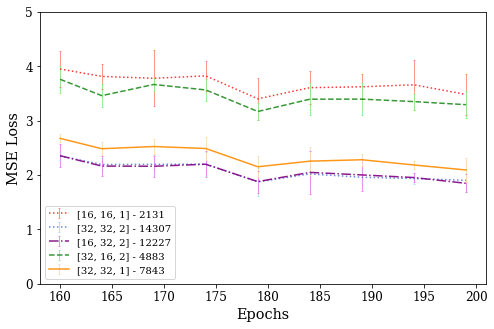

In [51]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(159, episode_num, 5)
epochs[0] = 160

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_16_16_1[epochs], yerr=std_16_16_1[epochs], color='red', ls='dotted',
            alpha=0.8, linewidth=1.5, ecolor='salmon', elinewidth=1, capsize=1, label='[16, 16, 1] - 2131')
ax.errorbar(epochs, mean_32_32_2[epochs], yerr=std_32_32_2[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1.5, ecolor='lightblue', elinewidth=1, capsize=1, label='[32, 32, 2] - 14307')
ax.errorbar(epochs, mean_16_32_2[epochs], yerr=std_16_32_2[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1.5, ecolor='violet', elinewidth=1, capsize=1, label='[16, 32, 2] - 12227')
ax.errorbar(epochs, mean_32_16_2[epochs], yerr=std_32_16_2[epochs], color='forestgreen', ls='dashed',
            alpha=0.9, linewidth=1.5, ecolor='lightgreen', elinewidth=1, capsize=1, label='[32, 16, 2] - 4883')
ax.errorbar(epochs, mean_32_32_1[epochs], yerr=std_32_32_1[epochs], color='darkorange', ls='solid',
            alpha=0.9, linewidth=1.5, ecolor='wheat', elinewidth=1, capsize=1, label='[32, 32, 1] - 7843')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 5)
ax.set_xticks(np.arange(160, 201, 5))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_parametertuning_2.png', dpi=300)

### Scalability
 - Module [8, 192, 2] - 343507
 - Module [8, 256, 1] - 336907
 - Module [8, 512, 1] - 1329163

In [57]:
mean_8_192_2, std_8_192_2 = stats_encoder(env, test_type, [37, 38, 39])
mean_8_256_1, std_8_256_1 = stats_encoder(env, test_type, [28, 29, 30])
mean_8_512_1, std_8_512_1 = stats_encoder(env, test_type, [31, 32, 33])

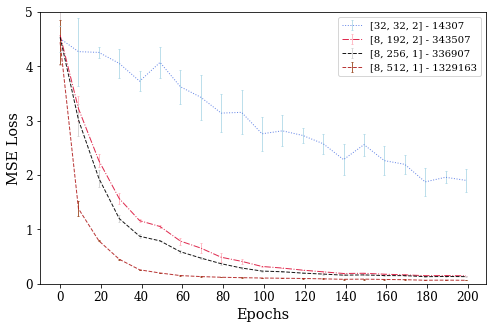

In [63]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(-1, episode_num, 10)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_32_32_2[epochs], yerr=std_32_32_2[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='[32, 32, 2] - 14307')
ax.errorbar(epochs, mean_8_192_2[epochs], yerr=std_8_192_2[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightpink', elinewidth=1, capsize=1, label='[8, 192, 2] - 343507')
ax.errorbar(epochs, mean_8_256_1[epochs], yerr=std_8_256_1[epochs], color='black', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='lightgrey', elinewidth=1, capsize=1, label='[8, 256, 1] - 336907')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - 1329163')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 5)
ax.set_xticks(np.arange(0, 201, 20))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_scalability_1.png', dpi=300)

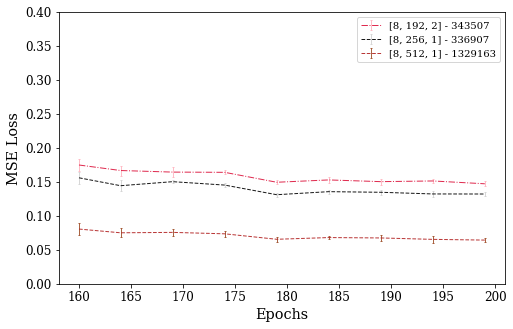

In [62]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(159, episode_num, 5)
epochs[0] = 160

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_8_192_2[epochs], yerr=std_8_192_2[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightpink', elinewidth=1, capsize=1, label='[8, 192, 2] - 343507')
ax.errorbar(epochs, mean_8_256_1[epochs], yerr=std_8_256_1[epochs], color='black', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='lightgrey', elinewidth=1, capsize=1, label='[8, 256, 1] - 336907')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - 1329163')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 0.4)
ax.set_xticks(np.arange(160, 201, 5))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_scalability_2.png', dpi=300)

### Adam Learning Rate
  - Module [8, 128, 1] - 86539  Lr=0.01
  - Module [8, 128, 1] - 86539  Lr=0.001
  - Module [8, 128, 1] - 86539  Lr=0.1

In [68]:
env = 'Pendulum'
test_type = 'AdamLr'
mean_8_128_1_01, std_8_128_1_01 = stats_encoder(env, test_type, [1, 2, 3])
mean_8_128_1_001, std_8_128_1_001 = stats_encoder(env, test_type, [4, 5, 6])
mean_8_128_1_1, std_8_128_1_1 = stats_encoder(env, test_type, [7, 8, 9])

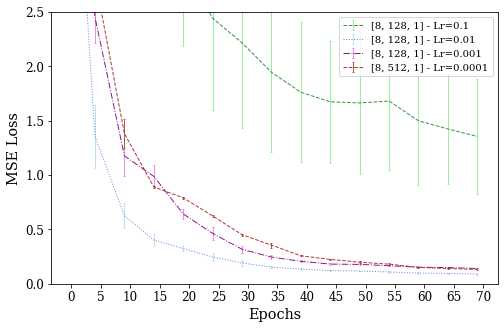

In [77]:
# Plot Range Settings
episode_num = 70
epochs = np.arange(-1, episode_num, 5)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_8_128_1_1[epochs], yerr=std_8_128_1_1[epochs], color='forestgreen', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.1')
ax.errorbar(epochs, mean_8_128_1_01[epochs], yerr=std_8_128_1_01[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.01')
ax.errorbar(epochs, mean_8_128_1_001[epochs], yerr=std_8_128_1_001[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.001')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - Lr=0.0001')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 2.5)
ax.set_xticks(np.arange(0, 71, 5))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_lr_1.png', dpi=300)


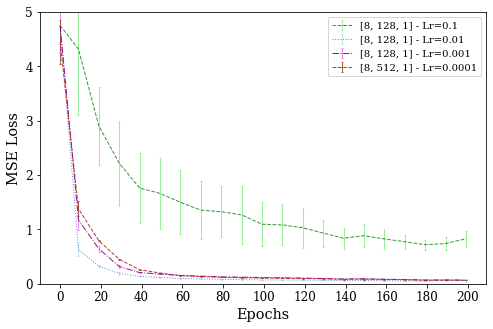

In [78]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(-1, episode_num, 10)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_8_128_1_1[epochs], yerr=std_8_128_1_1[epochs], color='forestgreen', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='lightgreen', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.1')
ax.errorbar(epochs, mean_8_128_1_01[epochs], yerr=std_8_128_1_01[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.01')
ax.errorbar(epochs, mean_8_128_1_001[epochs], yerr=std_8_128_1_001[epochs], color='purple', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='violet', elinewidth=1, capsize=1, label='[8, 128, 1] - Lr=0.001')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - Lr=0.0001')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 5)
ax.set_xticks(np.arange(0, 201, 20))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_lr_2.png', dpi=300)

### Causal Mask


In [64]:
env = 'Pendulum'

test_type = 'Causal'
mean_8_128_1_c, std_8_128_1_c = stats_encoder(env, test_type, [1, 2, 3])

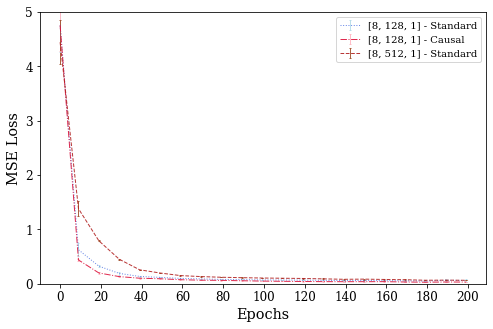

In [73]:
# Plot Range Settings
episode_num = 200
epochs = np.arange(-1, episode_num, 10)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_8_128_1_01[epochs], yerr=std_8_128_1_01[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='[8, 128, 1] - Standard')
ax.errorbar(epochs, mean_8_128_1_c[epochs], yerr=std_8_128_1_c[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightpink', elinewidth=1, capsize=1, label='[8, 128, 1] - Causal')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - Standard')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 5)
ax.set_xticks(np.arange(0, 201, 20))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_causal_1.png', dpi=300)

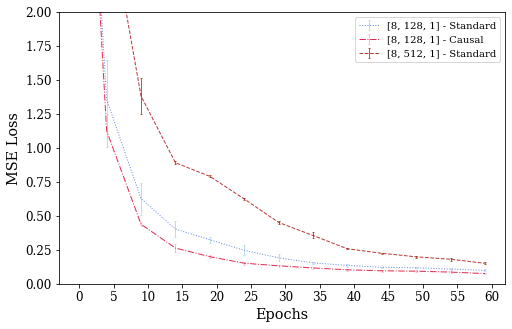

In [81]:
# Plot Range Settings
episode_num = 60
epochs = np.arange(-1, episode_num, 5)
epochs[0] = 0

# Create Plot Figure
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

# Plot Data
ax.errorbar(epochs, mean_8_128_1_01[epochs], yerr=std_8_128_1_01[epochs], color='royalblue', ls='dotted',
            alpha=0.8, linewidth=1, ecolor='lightblue', elinewidth=1, capsize=1, label='[8, 128, 1] - Standard')
ax.errorbar(epochs, mean_8_128_1_c[epochs], yerr=std_8_128_1_c[epochs], color='crimson', ls='dashdot',
            alpha=0.9, linewidth=1, ecolor='lightpink', elinewidth=1, capsize=1, label='[8, 128, 1] - Causal')
ax.errorbar(epochs, mean_8_512_1[epochs], yerr=std_8_512_1[epochs], color='firebrick', ls='dashed',
            alpha=0.9, linewidth=1, ecolor='sienna', elinewidth=1, capsize=1, label='[8, 512, 1] - Standard')

# Plot Decoration Settings
ax.legend(fontsize='medium')
ax.set_ylim(0, 2)
ax.set_xticks(np.arange(0, 61, 5))
ax.set_xlabel('Epochs')
ax.set_ylabel('MSE Loss')
fig.savefig('./thesis_plots/module_causal_2.png', dpi=300)

